### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [248]:
# Import packages
library(ggplot2)

In [249]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

### Data Exploration

In [250]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [251]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [252]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


##### Cleaning Data

In [253]:
ny = na.omit(ny)
wash = na.omit(wash)
chi = na.omit(chi)

### Analysis

#### Shared Functions

In [254]:
DetectCityDataset <- function(p_city) 
{
    if (p_city == 'Newyork')
    {
        df <- data.frame(ny)
    }
    else if (p_city == 'Washington')
    {
        df <- data.frame(wash)
    }
    else if (p_city == 'Chicago')
    {
        df <- data.frame(chi)
    }
    
    return(df)
}

### Question 1


**Your question 1 goes here.**

In [255]:
GetMostCommonMonth <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Extract month from Start.Time column and create table for that extracted month called Start.Month
    df$Start.Month <- format(as.Date(df$Start.Time), format = "%m")
    # Select Start.Month column into df_ny
    df <- df[c('Start.Month')]
    # Read Start.Month column to vector called start_month
    start_month <- as.vector(df[c('Start.Month')])
    # Get most common month
    mode = as.integer(names(sort(table(start_month),decreasing=TRUE)[1]))
    # Get corrsponding month name
    month <- switch(mode, "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
    
    # Return most common month
    return(paste("The most common month is", month, sep=" "))
}

In [256]:
GetMostCommonDay <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Extract day from Start.Time column and create table for that extracted day called Start.Day
    df$Start.Day <- format(as.Date(df$Start.Time), format = "%d")
    # Select Start.Day column into df_ny
    df <- df[c('Start.Day')]
    # Read Start.Day column to vector called start_day
    start_day <- as.vector(df[c('Start.Day')])
    # Get most common day
    mode = as.integer(names(sort(table(start_day),decreasing=TRUE)[1]))
    # Print most common day
    paste("The most common day is", mode, sep=" ")
    
    # Return most common day
    return(paste("The most common day is", mode, sep=" "))
}

In [257]:
GetMostCommonHour <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Extract hour from Start.Time column and create table for that extracted hour called Start.Hour
    df$Start.Hour <- strftime(df$Start.Time, format="%H")
    # Select Start.Hour column into df_ny
    df <- df[c('Start.Hour')]
    # Read Start.Hour column to vector called start_hour
    start_hour <- as.vector(df[c('Start.Hour')])
    # Get most common hour
    mode = as.integer(names(sort(table(start_hour),decreasing=TRUE)[1]))

    # Return most common hour
    return(paste("The most common hour is", mode, sep=" "))
}

In [258]:
# Newyork City
# ------------
GetMostCommonMonth('Newyork')

[1] "The most common month is June"

In [259]:
# Newyork City
# ------------
GetMostCommonDay('Newyork')

[1] "The most common day is 27"

In [260]:
# Newyork City
# ------------
GetMostCommonHour('Newyork')

[1] "The most common hour is 17"

In [261]:
# Washington City
# ---------------
GetMostCommonMonth('Washington')

[1] "The most common month is June"

In [262]:
# Washington City
# ---------------
GetMostCommonDay('Washington')

[1] "The most common day is 27"

In [263]:
# Washington City
# ---------------
GetMostCommonHour('Washington')

[1] "The most common hour is 8"

In [264]:
# Chicago City
# ------------
GetMostCommonMonth('Chicago')

[1] "The most common month is June"

In [265]:
# Chicago City
# ------------
GetMostCommonDay('Chicago')

[1] "The most common day is 22"

In [266]:
# Chicago City
# ------------
GetMostCommonHour('Chicago')

[1] "The most common hour is 17"

#### Summary of your question 1 results goes here

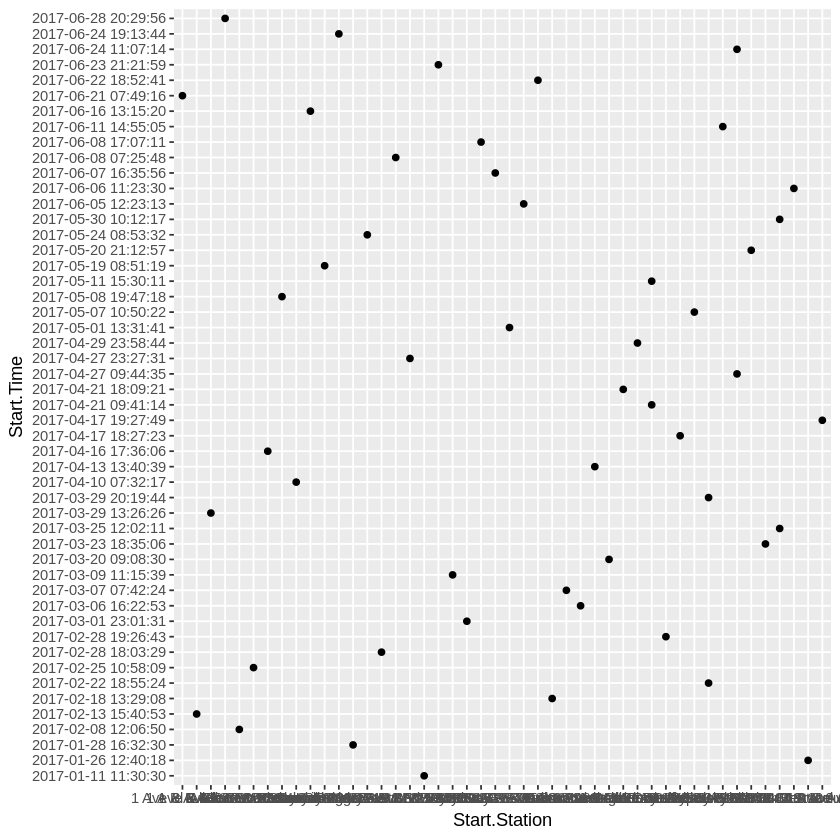

In [267]:
# Visualize results (Change dataframe to visualize another city)
ggplot(data = ny[1:50,]) + geom_point(mapping = aes(x = Start.Station, y = Start.Time))

### Question 2

**Your question 2 goes here.**

In [268]:
GetMostCommonStartStation <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Read Start.Station column to vector called start_station
    start_station <- as.vector(df[c('Start.Station')])
    # Get most common start station
    mode = suppressWarnings(names(sort(table(start_station),decreasing=TRUE)[1]))

    # Return most common hour
    return(paste("The most common start station is", mode, sep=" "))
}

In [269]:
GetMostCommonEndStation <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Read Start.Station column to vector called start_station
    end_station <- as.vector(df[c('End.Station')])
    # Get most common end station
    mode = suppressWarnings(names(sort(table(end_station),decreasing=TRUE)[1]))

    # Return most common hour
    return(paste("The most common end station is", mode, sep=" "))
}

In [270]:
GetMostCommonStartAndEndStation <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Extract Start.Station and End.Station columns only
    df <- df[c('Start.Station', 'End.Station')]
    # Get the most common (repeated) combination of Start.Station and End.Station
    mostCommonCombination = df[duplicated(df), ]

    # Return most common combination
    return(mostCommonCombination)
}

In [271]:
# Newyork City
# ------------
GetMostCommonStartStation('Newyork')

[1] "The most common start station is Pershing Square North"

In [272]:
# Newyork City
# ------------
GetMostCommonEndStation('Newyork')

[1] "The most common end station is Pershing Square North"

In [273]:
# Newyork City
# ------------
GetMostCommonStartAndEndStation('Newyork')

,Start.Station,End.Station
180,W 26 St & 8 Ave,W 38 St & 8 Ave
238,Pershing Square North,W 33 St & 7 Ave
301,York St & Jay St,Rivington St & Chrystie St
445,University Pl & E 14 St,Washington Pl & Broadway
557,W 20 St & 8 Ave,W 26 St & 8 Ave
611,Rivington St & Chrystie St,W Broadway & Spring St
849,Pershing Square North,E 17 St & Broadway
865,West St & Chambers St,11 Ave & W 59 St
879,11 Ave & W 27 St,8 Ave & W 16 St
980,Broadway & W 53 St,Broadway & W 41 St


In [274]:
# Washington City
# ---------------
GetMostCommonStartStation('Washington')

[1] "The most common start station is Columbus Circle / Union Station"

In [275]:
# Washington City
# ---------------
GetMostCommonEndStation('Washington')

[1] "The most common end station is Columbus Circle / Union Station"

In [276]:
# Washington City
# ---------------
GetMostCommonStartAndEndStation('Washington')

,Start.Station,End.Station
98,Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW
159,Constitution Ave & 2nd St NW/DOL,Constitution Ave & 2nd St NW/DOL
180,14th & Irving St NW,15th & W St NW
231,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW
290,4th St & Madison Dr NW,Lincoln Memorial
374,5th & K St NW,10th & E St NW
392,Columbus Circle / Union Station,Jefferson Dr & 14th St SW
414,11th & H St NE,Columbus Circle / Union Station
425,Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW
443,Jefferson Memorial,Lincoln Memorial


In [277]:
# Chicago City
# ------------
GetMostCommonStartStation('Chicago')

[1] "The most common start station is Clinton St & Washington Blvd"

In [278]:
# Chicago City
# ------------
GetMostCommonEndStation('Chicago')

[1] "The most common end station is Clinton St & Madison St"

In [279]:
# Chicago City
# ------------
GetMostCommonStartAndEndStation('Chicago')

,Start.Station,End.Station
111,Ogden Ave & Race Ave,Green St & Madison St
276,Michigan Ave & Washington St,Canal St & Adams St
299,Canal St & Madison St,Michigan Ave & Washington St
343,Canal St & Madison St,Columbus Dr & Randolph St
357,Sangamon St & Washington Blvd (*),Clinton St & Madison St
438,Loomis St & Jackson Blvd,Wabash Ave & 8th St
439,Canal St & Madison St,Michigan Ave & Washington St
468,Broadway & Barry Ave,Wilton Ave & Belmont Ave
539,Michigan Ave & Washington St,Canal St & Adams St
543,Clark St & Randolph St,Clinton St & Jackson Blvd


#### Summary of your question 2 results goes here

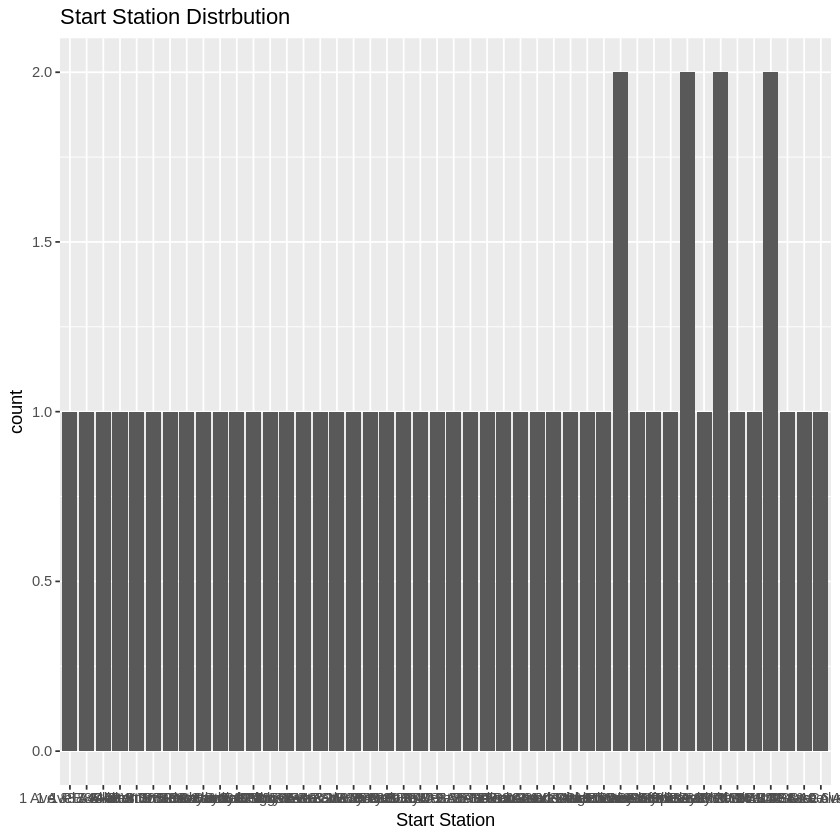

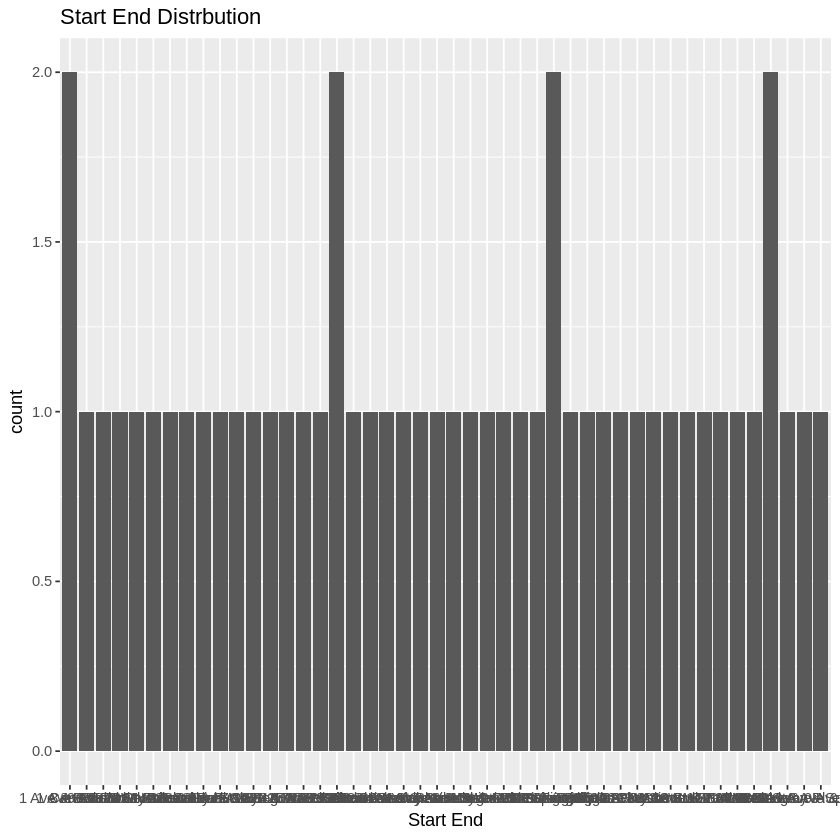

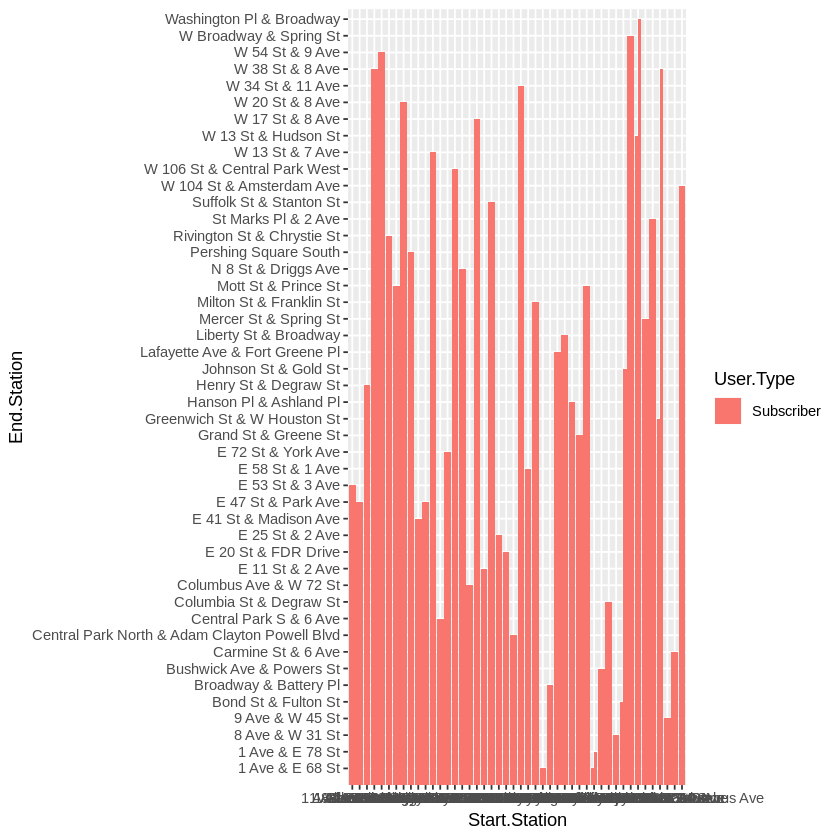

In [289]:
# Visualize results (Change dataframe to visualize another city)
ggplot(data = ny[1:50,], aes(x = Start.Station)) + 
       geom_bar() + 
       labs(x = "Start Station",
       title = "Start Station Distrbution")
ggplot(data = ny[1:50,], aes(x = End.Station)) + 
       geom_bar() + 
       labs(x = "Start End",
       title = "Start End Distrbution")
ggplot(data = ny[1:50,], 
       aes(Start.Station, End.Station, fill = User.Type)) + 
       geom_col(position = "dodge")

### Question 3

**Your question 3 goes here.**

In [281]:
GetTripDurationSum <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Get sum of trip duration
    sum = sum(df$Trip.Duration)
    
    # Return sum
    return(sum)
}

In [282]:
GetTripDurationAverage <- function(p_city) 
{
    df = DetectCityDataset(p_city)
    # Get average of trip duration
    avg = mean(df$Trip.Duration)

    # Return average
    return(avg)
}

In [283]:
# Newyork City
# ------------
GetTripDurationSum('Newyork')
GetTripDurationAverage('Newyork')

[1] 39410864

[1] 795.3436

In [284]:
# Washington City
# ---------------
GetTripDurationSum('Washington')
GetTripDurationAverage('Washington')

[1] 109883545

[1] 1233.953

In [285]:
# Chicago City
# ------------
GetTripDurationSum('Chicago')
GetTripDurationAverage('Chicago')

[1] 4715041

[1] 685.027

#### Summary of your question 3 results goes here

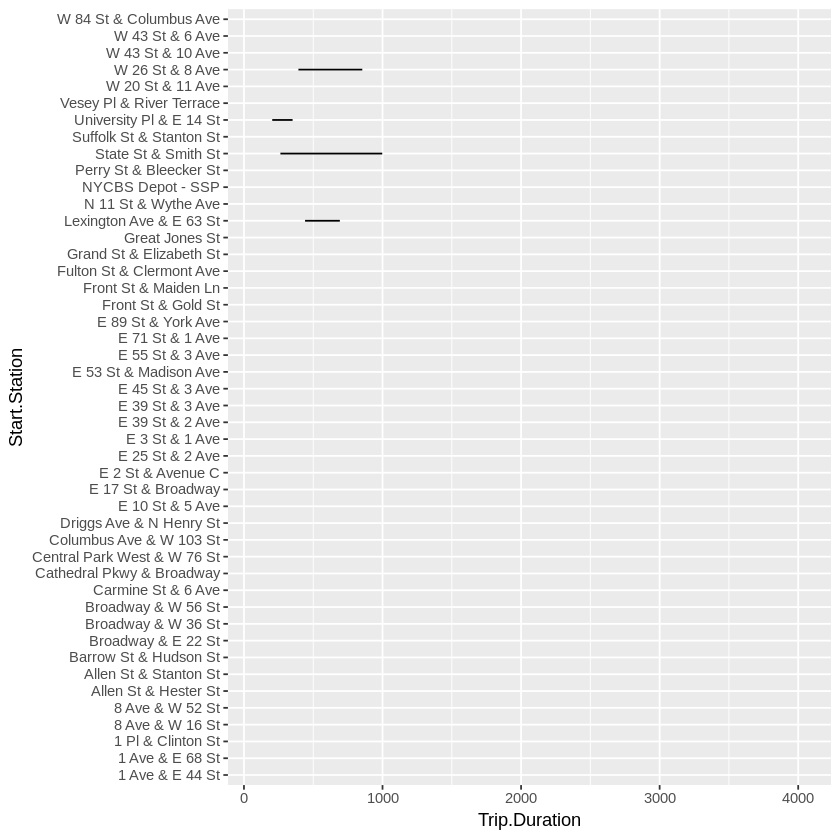

In [292]:
# Visualize results (Change dataframe to visualize another city)
ggplot(data = ny[1:50,], mapping = aes(x = Trip.Duration, y = Start.Station)) +
       geom_line()


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [293]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')